In [1]:
import os
import pandas as pd
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd, seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',10000)
os.chdir("/Users/subinpark2/Downloads/sra/")
%matplotlib inline

In [79]:
tablef=open("dic4_new.txt")
tablef=pd.DataFrame.from_csv(tablef,sep="\t",header=None,index_col=False)
tablef.columns=['ID','Genome','GenomeCount']
tablef=tablef.sort_values(by='GenomeCount',ascending=False)
#tablef

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [4]:
#plt.style()
tablef=open("dic4_new.txt")
tablef=pd.DataFrame.from_csv(tablef,sep="\t",header=None,index_col=False)
tablef.columns=['ID','Genome','GenomeCount']
tablef=tablef.sort_values(by='GenomeCount',ascending=False)
tablef.plot.bar(xlim=(0,710),ylim=(0,40),fontsize=2.5,rot=90)
plt.xlabel('Subtype')
plt.ylabel('GenomeCount')
plt.savefig('graph.pdf')
#plt.show()


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
t=pd.DataFrame.from_csv("nor.csv",sep=",",header=None)
len(t)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


700

In [19]:
import numpy as np
df=pd.DataFrame.from_csv("nor.csv",sep=",")
linkage_matrix = linkage(df,'average')
dendrogram(
    linkage_matrix,
    leaf_rotation=0,
    leaf_font_size=2,
    labels=df.columns,
    orientation='left',
    show_leaf_counts=True,
    #color_threshold=0.3
)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('sra700sp')
#plt.figure(figsize=(300,300))
#plt.show()
color_threshold=None

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
sns.set(font="monospace")
sns.set(font_scale=0.1) 
linkage = hc.linkage(sp.distance.squareform(df), method='average')
sns.clustermap(df, row_linkage=linkage, col_linkage=linkage)
plt.show()

ValueError: The matrix argument must be square.

In [20]:
from scipy.cluster import hierarchy
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(linkage_matrix,False)
n=getNewick(tree, "", tree.dist, df.index)

with open("byejoao.nex","w") as ofile:
    ofile.write(n.strip(''))
    ofile.close

In [70]:
f=open("SRA700_tree.nwk")
for line in f:
    t2=line

In [42]:
from Bio import Phylo

In [109]:
t1=Phylo.read('SRA700_tree.nwk2.tre','newick')
t2 =Phylo.read('n100.tre', 'newick')

In [117]:
type(t3)

ete3.coretype.tree.TreeNode

In [128]:
import ete3
from ete3 import Tree
t3=Tree("SRA700_tree.nwk2.tre")
t4=Tree("n100.tre")
rf, max_rf, common_leaves, parts_t3, parts_t4= t3.robinson_foulds(t4)
#print(t1, t2)
print("RF distance is %s over a total of %s" %(rf, max_rf))
#print("Partitions in tree2 that were not found in tree1:", parts_t1 - parts_t2)
#print("Partitions in tree1 that were not found in tree2:", parts_t2 - parts_t1)



ValueError: too many values to unpack (expected 5)

In [144]:
rf, common_attrs, names, edges_t3, edges_t4,discarded_edges_t3, discarded_edges_t4=t3.robinson_foulds(t4)

In [158]:
b=Tree.compare(t3,t4)
b.keys()

dict_keys(['rf', 'max_rf', 'ref_edges_in_source', 'source_edges_in_ref', 'effective_tree_size', 'norm_rf', 'treeko_dist', 'source_subtrees', 'common_edges', 'source_edges', 'ref_edges'])

In [183]:
#print(b['ref_edges_in_source'],b['source_edges_in_ref'])
#print(b['norm_rf'])
#len(b['ref_edges']-b['source_edges'])
#len(b['source_edges']-b['ref_edges'])
len(b['common_edges'])

235

In [ ]:
# We can also compare trees sharing only part of their labels
rf, max_rf, common_leaves, parts_t1, parts_t2 = t1.robinson_foulds(t2)
print(t1, t2)
print("Same distance holds even for partially overlapping trees")
print("RF distance is %s over a total of %s" %(rf, max_rf))
print("Partitions in tree2 that were not found in tree1:", parts_t1 - parts_t2)
print("Partitions in tree1 that were not found in tree2:", parts_t2 - parts_t1)

In [86]:
import re

In [94]:
f = open("sra700_nodename",'r')
values = f.read()
val1 = re.split(r"\n+",values)
#print(val1)

In [95]:
f2= open("core50nodename",'r')
values = f2.read()
val2 = re.split(r"\n+",values)

In [100]:
for name in val1:
    if name not in val2:
        print(name)

In [108]:
for name in val2:
    if name not in val1:
        print(name)

Node names
ERR1597493
SRR4374058
SRR4319235
ERR1608279
SRR6003607


In [105]:
len(a)

0

In [184]:
import numpy as np


In [2]:
a=pd.read_csv("combine_graph.csv")

In [48]:
a.head()

,Unnamed: 0,Strain,cgST,ST
0,91,SRR4319279,0,731
1,94,SRR4319265,0,731
2,96,SRR4319261,0,731
3,111,SRR4319270,0,731
4,112,SRR4319257,0,731


In [3]:
a['ST1']=a[a['ST']=='1']['ST']
a['ST1']=a['ST1'].fillna(0)


In [4]:
a['ST47']=a[a['ST']=='47']['ST']
a['ST47']=a['ST47'].fillna(0)

In [5]:
a.head()

,Unnamed: 0,Strain,cgST,ST,ST1,ST47
0,307,ERR1399498,1,1,1,0
1,312,ERR1399520,1,1,1,0
2,316,ERR1399534,1,1,1,0
3,317,ERR1399567,1,1,1,0
4,318,ERR1399553,1,1,1,0


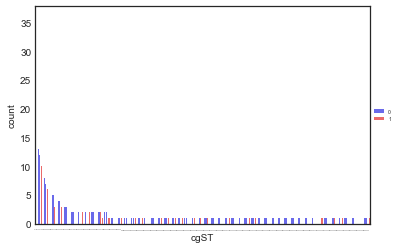

In [77]:
sns.countplot(x='cgST',hue='ST1',data=a,palette='seismic')
sns.set_style('white')
#plt.ylim(ymax=3) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=5)
plt.xticks(rotation=90,fontsize =1)
plt.figure(figsize=(50,50))
plt.show()
#plt.savefig('test_hue000.pdf')

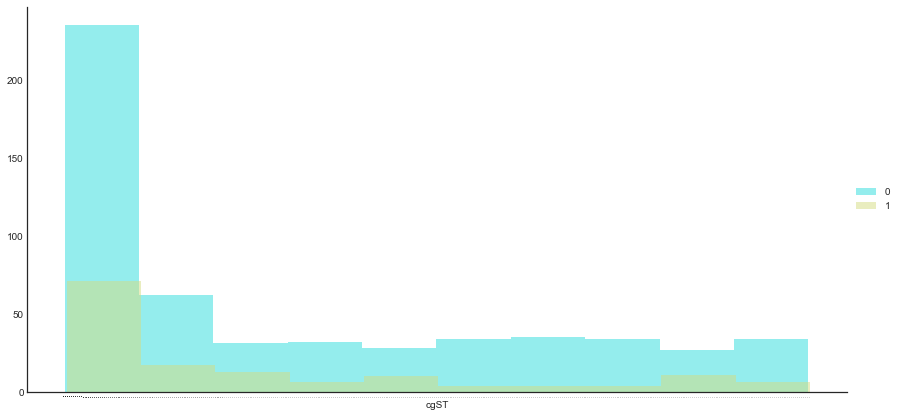

In [75]:
plt.figure(figsize=(10,10))
sns.set_style('white')
bar_width=0.75
#bar_l = [i+1 for i in range(len(mdf2['subtype_name']))]
# positions of the x-axis ticks (center of the bars as bar labels)
#tick_pos = [i+(bar_width/2) for i in bar_l] 
g=sns.FacetGrid(a,hue='ST1',palette='rainbow',size=6,aspect=2)
g.map(plt.hist,'cgST',alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10)
plt.xticks(a['cgST'],rotation=90,fontsize=1)
plt.show()

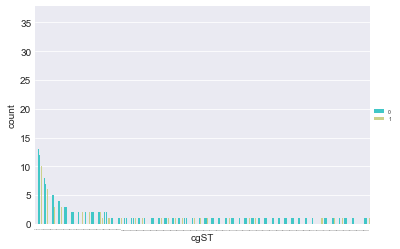

In [43]:
sns.countplot(x='cgST',data=a,hue='ST1',palette='rainbow')
#sns.set_context('paper')
#plt.ylim(ymax=3) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=5)
plt.xticks(rotation=90,fontsize =1)
plt.figure(figsize=(30,30))
plt.show()
plt.savefig('test_hue000.pdf')

In [64]:
#a['ST1']

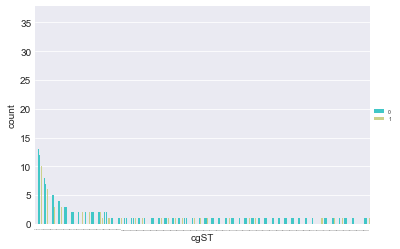

In [73]:
sns.countplot(x='cgST',hue='ST1',data=a,palette='rainbow')
#sns.set_context('paper')
#plt.ylim(ymax=3) 
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=5)
plt.xticks(rotation=90,fontsize =1)
plt.figure(figsize=(50,50))
plt.show()
#plt.savefig('test_hue000.pdf')

In [5]:
tspades=pd.read_csv("dic4_new_spades.txt",sep="\t",header=None)

In [6]:
tspades.columns=['ID','Genome','GenomeCount']
tspades=tspades.sort_values(by='GenomeCount',ascending=False)

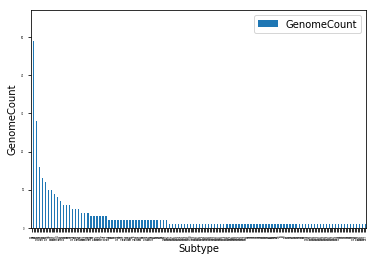

In [7]:
tspades.plot.bar(xlim=(0,len(tspades)),ylim=(0,tspades['GenomeCount'].iloc[0]),fontsize=2.5,rot=90)
plt.xlabel('Subtype')
plt.ylabel('GenomeCount')
plt.show()

In [8]:
tspades['GenomeCount'].iloc[0]

57

In [121]:
len(tspades)

224

In [6]:
a=pd.read_csv("ST_cgST_S.csv")

In [7]:
a.head()

,Unnamed: 0,ST,cgST_S
0,0,Null,0
1,1,2256,1
2,2,Null,2
3,3,Null,1
4,4,25,3


In [8]:
a=a.drop("Unnamed: 0",axis=1)

In [9]:
a['ST1']=a[a['ST']=='1']['ST']
a['ST1']=a['ST1'].fillna(0)

In [126]:
a.sor

,ST,cgST_S,ST1
0,Null,0,0
1,2256,1,0
2,Null,2,0
3,Null,1,0
4,25,3,0


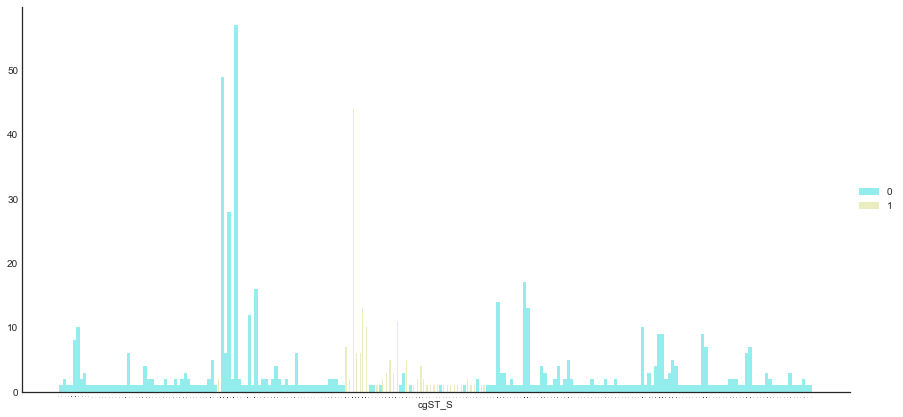

In [127]:
g=sns.FacetGrid(a,hue='ST1',palette='rainbow',size=6,aspect=2)
g.map(plt.hist,'cgST_S',alpha=0.5,bins=len(tspades))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10)
plt.xticks(a['cgST_S'],rotation=90,fontsize=1)
plt.show()

In [10]:
b=pd.read_csv("Strian_ST_cgST_S_profile_count.csv")

In [11]:
b.head()

,Unnamed: 0,Strain,cgST,ST,cgST_S,profile,Count
0,0,SRR5831909,166,Null,0,"['lpg0577_1', 'lpg1830_2', 'lpg1566_3', 'lpg2231_2', 'lpg2339_29', 'lpg2516_27', 'lpg0287_3', 'lpg1398_2', 'lpg0461_32', 'lpg1206_20', 'lpg1882_2', 'lpg1737_33', 'lpg2461_7', 'lpg1636_30', 'lpg0840_37', 'lpg1144_23', 'lpg0028_26', 'lpg0356_24', 'lpg2577_1', 'lpg0956_1', 'lpg2404_29', 'lpg0432_24', 'lpg2933_3', 'lpg1782_21', 'lpg1283_30', 'lpg1511_4', 'lpg0656_38', 'lpg0513_2', 'lpg2698_34', 'lpg0888_22', 'lpg2795_31', 'lpg2280_2', 'lpg1682_3', 'lpg2869_19', 'lpg2175_2', 'lpg2827_1', 'lpg2622_4', 'lpg2743_29', 'lpg0212_1', 'lpg2999_2', 'lpg0116_2', 'lpg0785_39', 'lpg0330_21', 'lpg1340_1', 'lpg0078_39', 'lpg1452_3', 'lpg0712_3', 'lpg1178_29', 'lpg2039_32', 'lpg1994_31']",1
1,1,SRR4345223,ND,2256,1,"['lpg0577_2', 'lpg1830_27', 'lpg1566_38', 'lpg2231_7', 'lpg2339_7', 'lpg2516_17', 'lpg0287_17', 'lpg1398_15', 'lpg0461_13', 'lpg1206_5', 'lpg1882_23', 'lpg1737_9', 'lpg2461_2', 'lpg1636_16', 'lpg0840_11', 'lpg0028_2', 'lpg0356_9', 'lpg2577_41', 'lpg0956_9', 'lpg2404_5', 'lpg0432_2', 'lpg2933_42', 'lpg1782_16', 'lpg1283_2', 'lpg1511_29', 'lpg0656_32', 'lpg0513_10', 'lpg2698_2', 'lpg0888_4', 'lpg2795_5', 'lpg2280_23', 'lpg1682_22', 'lpg2869_6', 'lpg2175_27', 'lpg2827_17', 'lpg2622_17', 'lpg2743_15', 'lpg0212_6', 'lpg2999_8', 'lpg0116_12', 'lpg0785_8', 'lpg0330_13', 'lpg1340_13', 'lpg0078_5', 'lpg1452_4', 'lpg0712_4', 'lpg1178_17', 'lpg2039_1', 'lpg1994_3']",2
2,2,ERR1470976,ND,Null,2,"['lpg0577_2', 'lpg1830_28', 'lpg1566_38', 'lpg2231_7', 'lpg2339_7', 'lpg2516_17', 'lpg0287_17', 'lpg1398_15', 'lpg0461_13', 'lpg1206_5', 'lpg1882_23', 'lpg1737_11', 'lpg2461_2', 'lpg1636_16', 'lpg0840_12', 'lpg0028_2', 'lpg0356_9', 'lpg2577_41', 'lpg0956_9', 'lpg2404_5', 'lpg0432_2', 'lpg2933_42', 'lpg1782_18', 'lpg1283_2', 'lpg1511_29', 'lpg0656_9', 'lpg0513_10', 'lpg2698_2', 'lpg0888_4', 'lpg2795_5', 'lpg2280_23', 'lpg1682_23', 'lpg2869_6', 'lpg2175_27', 'lpg2827_17', 'lpg2622_17', 'lpg2743_15', 'lpg0212_6', 'lpg2999_8', 'lpg0116_30', 'lpg0785_14', 'lpg0330_13', 'lpg1340_14', 'lpg0078_4', 'lpg1452_4', 'lpg0712_31', 'lpg1178_17', 'lpg2039_1', 'lpg1994_4']",1
3,3,SRR4363235,ND,Null,1,"['lpg0577_2', 'lpg1830_27', 'lpg1566_38', 'lpg2231_7', 'lpg2339_7', 'lpg2516_17', 'lpg0287_17', 'lpg1398_15', 'lpg0461_13', 'lpg1206_5', 'lpg1882_23', 'lpg1737_9', 'lpg2461_2', 'lpg1636_16', 'lpg0840_11', 'lpg0028_2', 'lpg0356_9', 'lpg2577_41', 'lpg0956_9', 'lpg2404_5', 'lpg0432_2', 'lpg2933_42', 'lpg1782_16', 'lpg1283_2', 'lpg1511_29', 'lpg0656_32', 'lpg0513_10', 'lpg2698_2', 'lpg0888_4', 'lpg2795_5', 'lpg2280_23', 'lpg1682_22', 'lpg2869_6', 'lpg2175_27', 'lpg2827_17', 'lpg2622_17', 'lpg2743_15', 'lpg0212_6', 'lpg2999_8', 'lpg0116_12', 'lpg0785_8', 'lpg0330_13', 'lpg1340_13', 'lpg0078_5', 'lpg1452_4', 'lpg0712_4', 'lpg1178_17', 'lpg2039_1', 'lpg1994_3']",2
4,4,ERR376749,126,25,3,"['lpg0577_3', 'lpg1830_15', 'lpg1566_40', 'lpg2231_14', 'lpg2339_11', 'lpg2516_19', 'lpg0287_20', 'lpg1398_14', 'lpg0461_11', 'lpg1206_13', 'lpg1882_24', 'lpg1737_20', 'lpg2461_18', 'lpg1636_10', 'lpg0840_17', 'lpg1144_21', 'lpg0028_3', 'lpg0356_8', 'lpg2577_42', 'lpg0956_18', 'lpg2404_17', 'lpg0432_4', 'lpg2933_31', 'lpg1782_17', 'lpg1283_5', 'lpg1511_20', 'lpg0656_28', 'lpg0513_20', 'lpg2698_10', 'lpg0888_19', 'lpg2795_8', 'lpg2280_26', 'lpg1682_30', 'lpg2869_18', 'lpg2175_18', 'lpg2827_18', 'lpg2622_32', 'lpg2743_17', 'lpg0212_26', 'lpg2999_19', 'lpg0116_15', 'lpg0785_5', 'lpg0330_12', 'lpg1340_27', 'lpg0078_12', 'lpg1452_12', 'lpg0712_24', 'lpg1178_15', 'lpg2039_16', 'lpg1994_21']",1


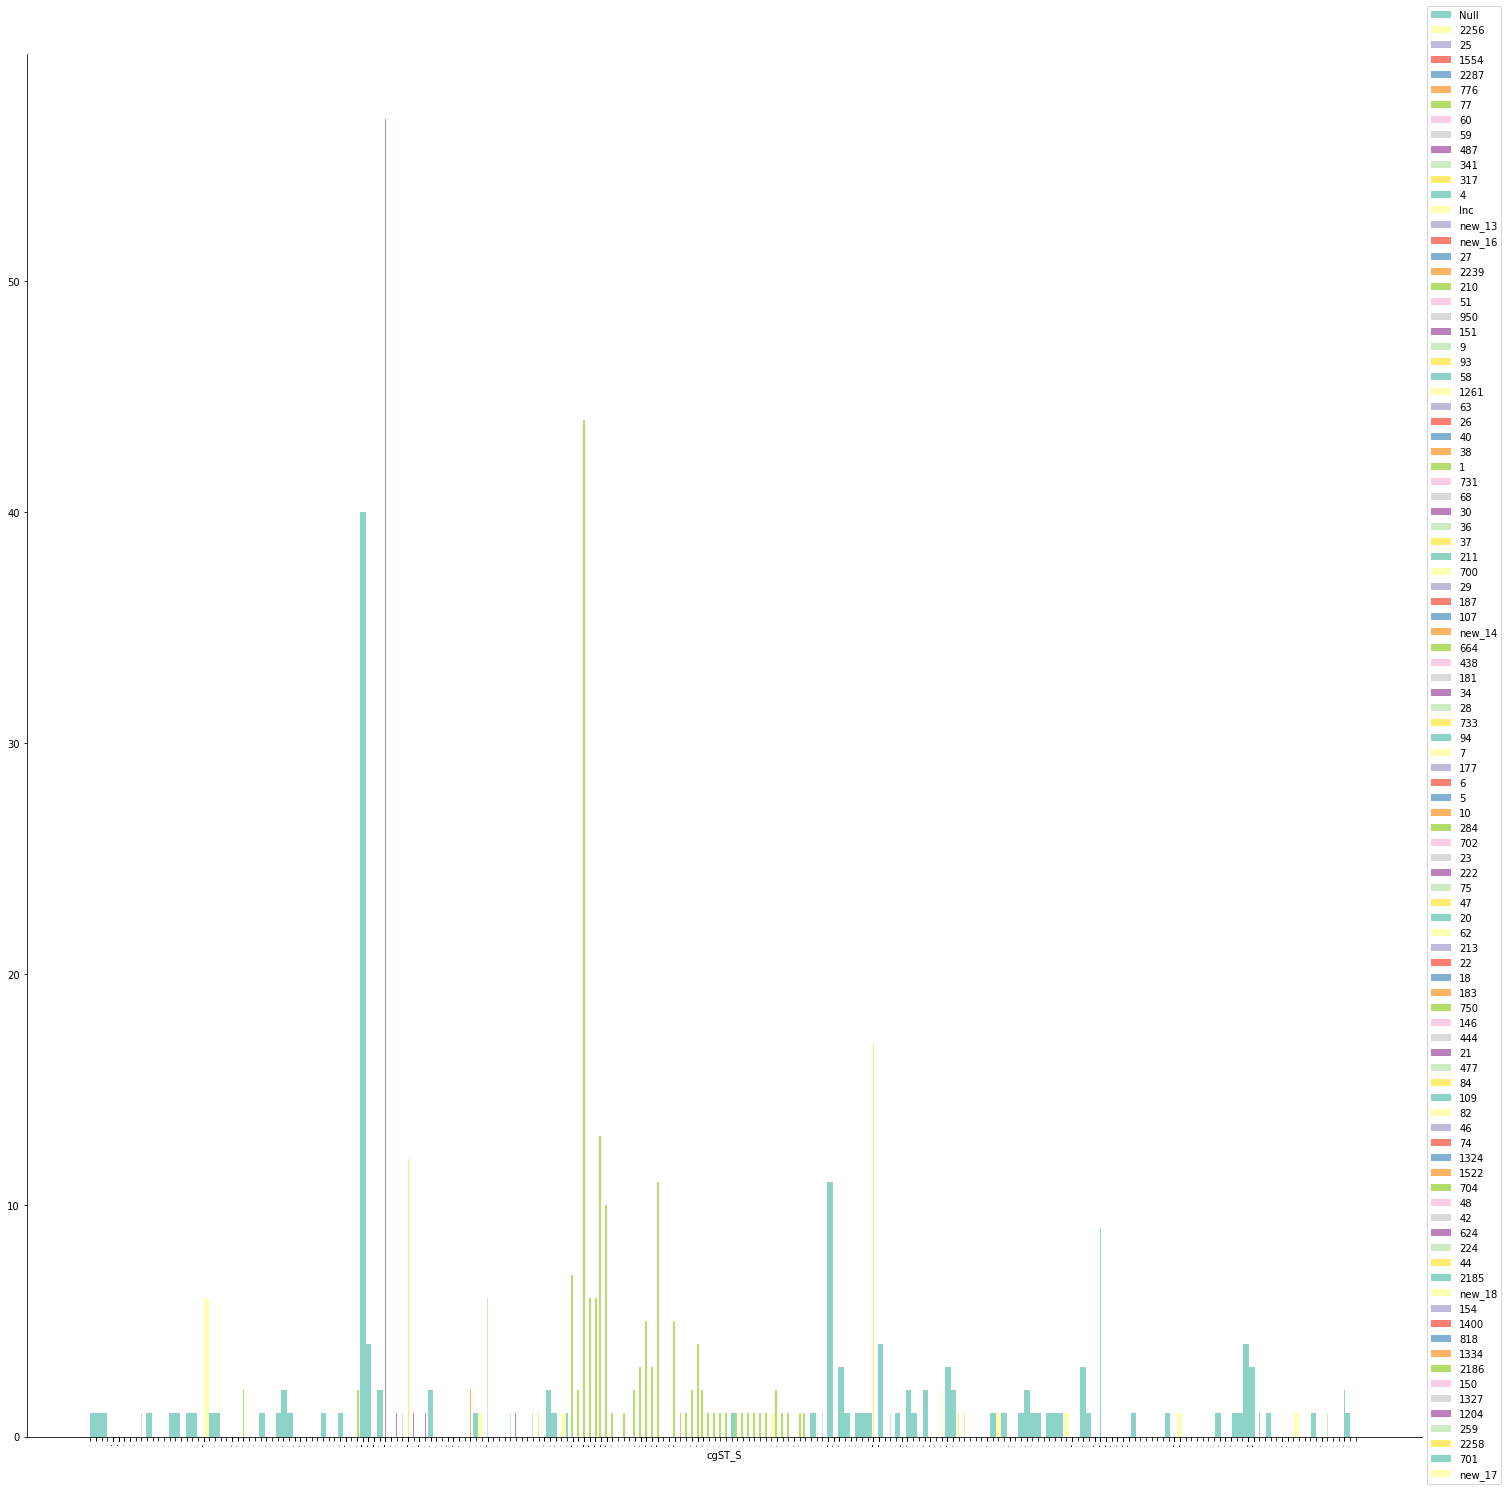

In [12]:
g=sns.FacetGrid(a,hue='ST',palette='Set3',size=20)
g.map(plt.hist,'cgST_S',bins=224)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10)
plt.xticks(a['cgST_S'],rotation=90,fontsize=0.5)
plt.show()

KeyError: 'cgST'

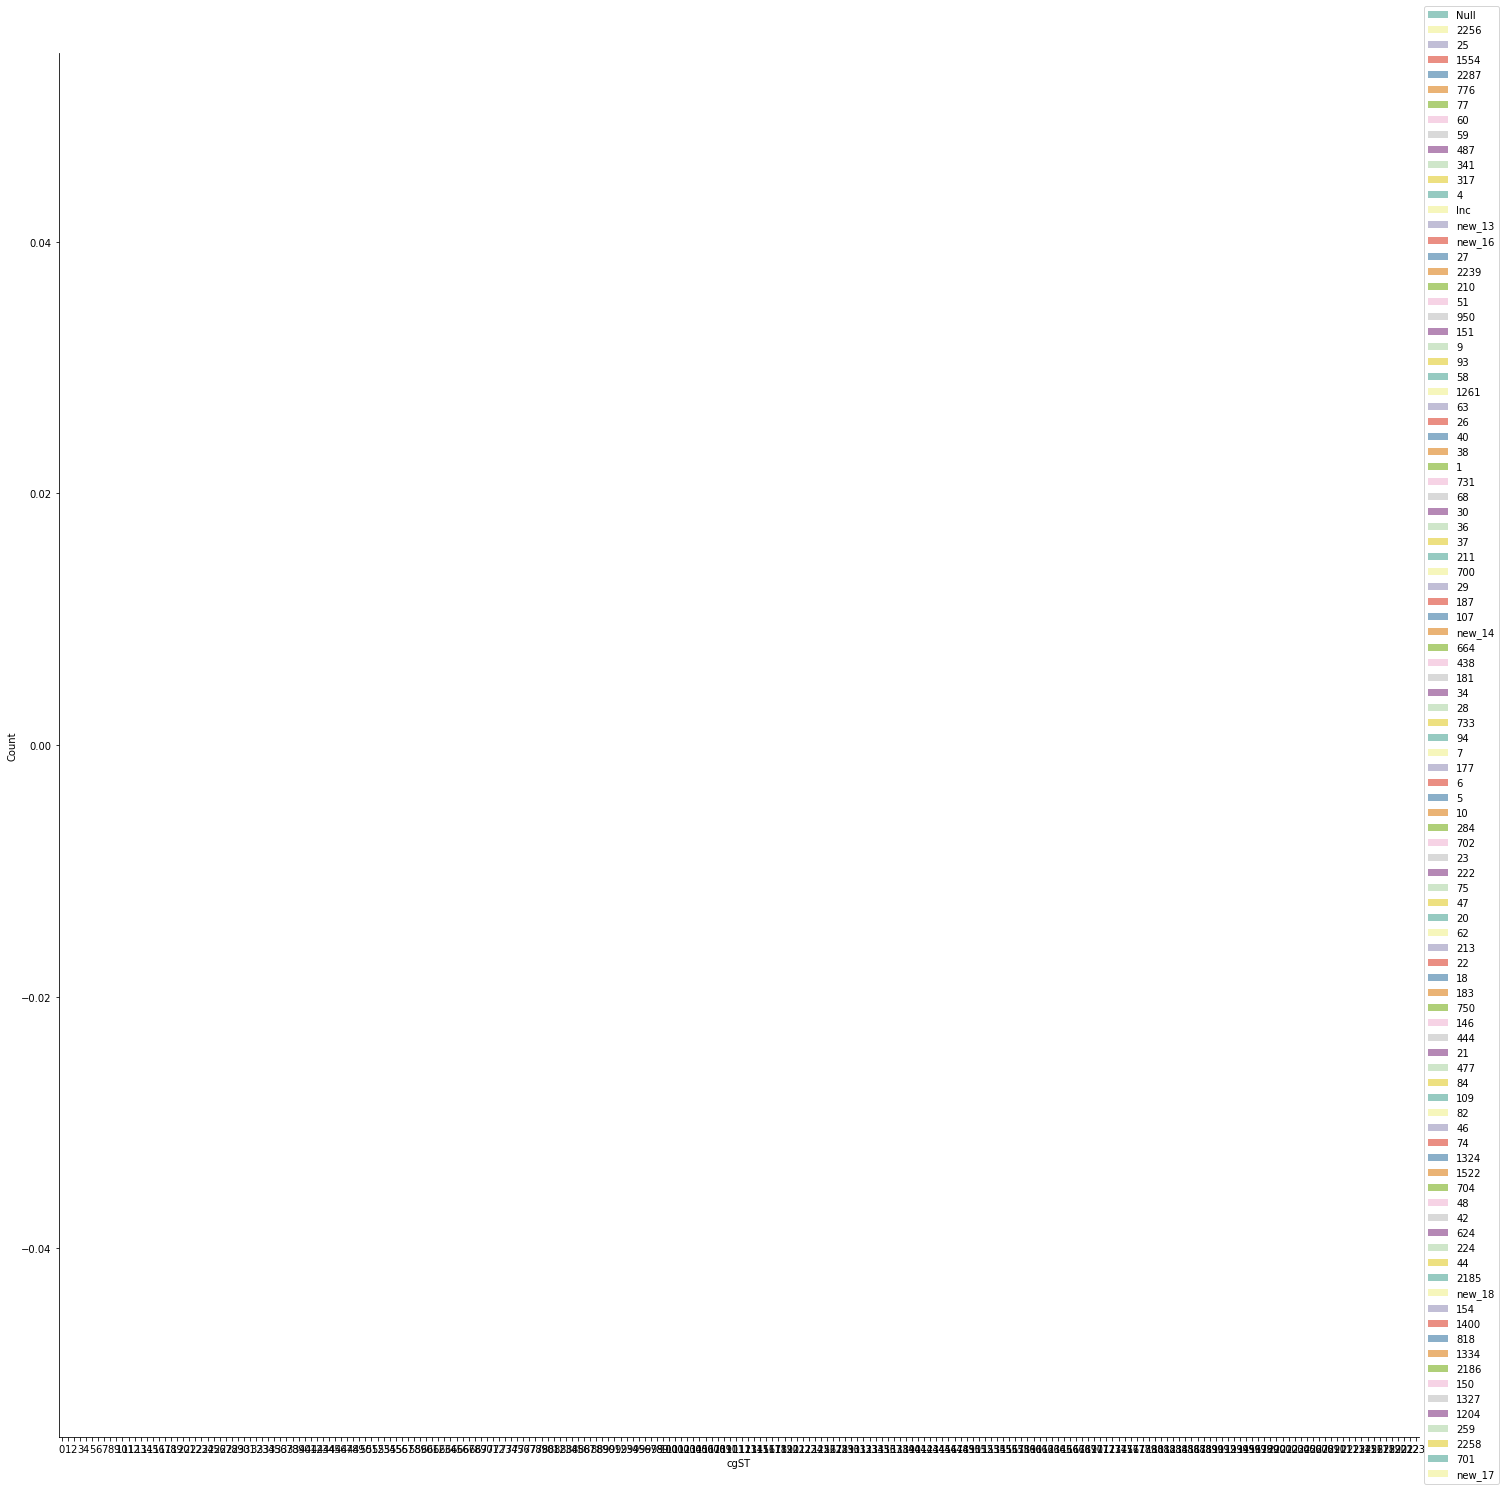

In [16]:
#cgST =b.cgST_S.unique()
g=sns.FacetGrid(b,hue='ST',palette='Set3',size=20)
g.map(sns.barplot,'cgST','Count',order=cgST)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10)
plt.xticks(a['cgST'],rotation=90,fontsize=5)
plt.show()

In [14]:
cgST =b.cgST_S.unique()
cgST

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18